## <div align='center'> CAPRAZ DOGRULAMA

##### Bu ödevde, önceki derste Titanic verileri ile oluşturduğunuz modelin performansını ölçeceksiniz. Bu ödevi tamamlamak için, aşağıdaki görevlerin çözümlerini içeren bir Jupyter not defterini link olarak gönderin. Kafanıza takılan konuları mentörünüzle konuşabilir ya da ofis saatinde Slack üzerinden sorabilirsiniz.

##### Modelinizin performansı çapraz doğrulama yaparak ve farklı metrikler kullanarak değerlendirin.
##### Hiperparemetre ayarlaması yaparak en uygun parametrelere sahip modeli belirleyin.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore') 


In [2]:
df = pd.read_csv('data/titanic_data.csv')

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age']= df['Age'].fillna(df['Age'].mean())
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [5]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [8]:
df.Sex = df.Sex.map({'male':0, 'female':1})

In [9]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [10]:
df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [11]:
df['Title'] = df.Title.map({'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Dr':4,
                            'Ms':5, 'Major':6, 'Lady':7, 'Sir':8, 'Don':9,
                            'Rev':10, 'Mme':11, 'Mlle':12, 'Col':13, 'Capt':14,
                            'Countess':15, 'Jonkheer':16})

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,B96 B98,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,B96 B98,S,0


In [13]:
corr_matrix= df.corr()
corr_matrix

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,0.032193
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.257266
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.177150
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.338900
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.066736
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,0.134931
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,0.133374
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.097704
Title,0.032193,0.257266,-0.177150,0.338900,-0.066736,0.134931,0.133374,0.097704,1.000000


In [14]:
corr_list = corr_matrix.Survived.abs().sort_values(ascending=False).index[1:]
corr_list

Index(['Sex', 'Pclass', 'Fare', 'Title', 'Parch', 'Age', 'SibSp',
       'PassengerId'],
      dtype='object')

In [15]:
X = df[corr_list]
y = df.Survived

print(len(X), len(y))
print('......'*10)
print("Veri kümesinde {} satır veri bulunmakta...".format(len(X)))

891 891
............................................................
Veri kümesinde 891 satır veri bulunmakta...


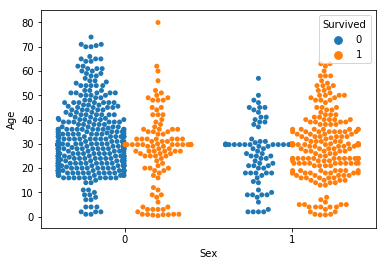

In [22]:
import seaborn as sns


ax = sns.swarmplot(x="Sex", y="Age", hue= "Survived", data=df, dodge=True)

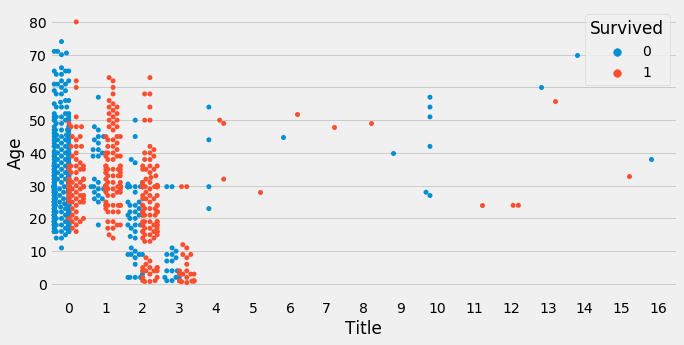

In [29]:
from matplotlib import  pyplot as plt

plt.figure(figsize= (10,5))

ax = sns.swarmplot(x="Title", y="Age", hue= "Survived", data=df, dodge=True)


#'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Dr':4,
#'Ms':5, 'Major':6, 'Lady':7, 'Sir':8, 'Don':9,
#'Rev':10, 'Mme':11, 'Mlle':12, 'Col':13, 'Capt':14,
#'Countess':15, 'Jonkheer':16

## 1.1. Verileri eğitim ve test kümesi olarak ayırma

In [30]:
plt.style.use('fivethirtyeight')

X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2)
print("Eğitim veri kümesindeki satır sayısı :  {} ".format(len(X_egitim)))
print("Eğitim veri kümesindeki hedef sayısı :  {} ".format(len(y_egitim)))
print("Test veri kümesindeki satır sayısı :  {} ".format(len(X_test)))
print("Test veri kümesindeki hedef sayısı :  {} ".format(len(y_test)))

Eğitim veri kümesindeki satır sayısı :  712 
Eğitim veri kümesindeki hedef sayısı :  712 
Test veri kümesindeki satır sayısı :  179 
Test veri kümesindeki hedef sayısı :  179 


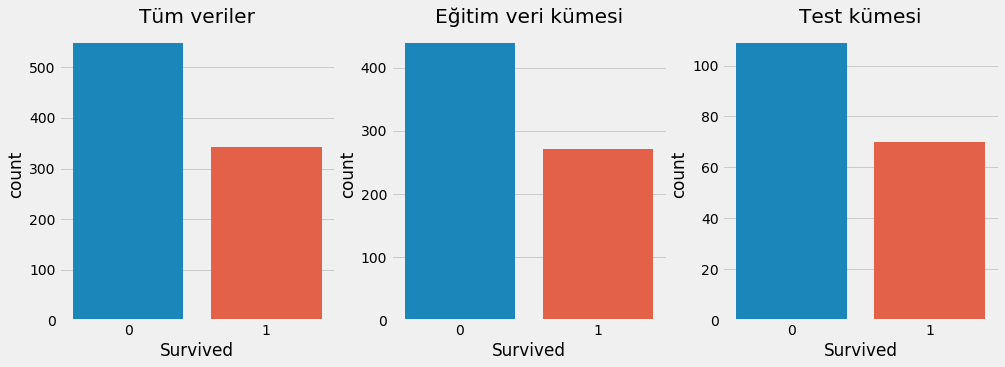

Tüm veri kümesi '0' yüzdesi : %62 
Test verisi '0' yüzdesi     : %61 
Eğitim verisi '0' yüzdesi   : %62 


In [31]:
plt.figure(figsize=(15,5))

plt.subplot(131)
sns.countplot(y)
plt.title("Tüm veriler")

plt.subplot(132)
sns.countplot(y_egitim)
plt.title("Eğitim veri kümesi")

plt.subplot(133)
sns.countplot(y_test)
plt.title("Test kümesi")

plt.show()

print("Tüm veri kümesi '0' yüzdesi : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Test verisi '0' yüzdesi     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))
print("Eğitim verisi '0' yüzdesi   : %{:.0f} ".format(len(y_egitim[y_egitim==0])/len(y_egitim)*100))

#### <font color='light blue'>Tüm veri kümesinde hedef sınıflar eşit olarak dağılmasına rağmen test ve eğitim kümesinde bu oranın korunmadığını görüyoruz. Bunun üstesinden verileri ayrırken stratify=y olarak belirtirek gelebiliriz. Böylece verilerimiz y içerisindeki değerleri mümkün olduğunca eşit olarak dağıtılacak şekilde eğitim ve test kümesi olarak ayrılacaktır.

In [32]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print("Tüm veri kümesi '0' yüzdesi : %{:.0f} ".format(len(y[y==0])/len(y)*100))
print("Test verisi '0' yüzdesi     : %{:.0f} ".format(len(y_test[y_test==0])/len(y_test)*100))
print("Eğitim verisi '0' yüzdesi   : %{:.0f} ".format(len(y_egitim[y_egitim==0])/len(y_egitim)*100))

Tüm veri kümesi '0' yüzdesi : %62 
Test verisi '0' yüzdesi     : %61 
Eğitim verisi '0' yüzdesi   : %62 


In [33]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_egitim, y_egitim)
tahmin_eğitim = model.predict(X_egitim)
tahmin_test = model.predict(X_test)
model.score(X_test, y_test)

0.7932960893854749

#### <font color='light blue'> Verilerimizi y değerleri eşit dağılacak şekilde ayırdık ve modelimizi eğittik. Ancak X değerlerinin nasıl dağıldığını bilmiyoruz. İşte bunun için çapraz doğrulamaya ihtiyaç duyacağız.

### 1.2. K-Katlı Çapraz Doğrulama (K-Fold Cross Validation)

#### <font color='gray'> Test kümesini rastgele belirlediğimizden, modelimiz hiç görmediği değerler için tahmin yapmaya çalışacak ve doğal olarak başarısı düşük olacaktır. Bu durumla daha çok kategorik değişkenlerde karşılaşma ihtimalimiz daha fazla olacaktır. Veri kümesinde çok az sayıda olan kategorinin tamamı test kümesine denk gelmesi bizi bu problemle karşı karşıya bırakacaktır.

#### <font color='gray'>Test kümesinde önemli verileri bırakmamak için K-katlı çapraz doğrulama yöntemini kullanacağız. Bu yöntemde verimizi belirleyeceğimiz adete (K) bölecek ve bir parçasını test için ayıracak, kalan 4 parça ile modeli eğiteceğiz. Her defasında test için seçilen kısım değişecek ve model toplamda K defa eğitilecektir. Her eğitim sonundaki modelin performans değerlerinin ortalaması modelimizin performansını verecektir.

#### <font color='gray'> Bu yöntemle eğitimde ya da test aşamasına dahil edilmemiş veri kalmamaktadır.



### 1.2.1 KFold ile çapraz doğrulama

In [34]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=20)


#split() fonksiyonu veriyi henüz bölmedi, bölebilmek için indeks numaralarını ortaya çıkardı. 
#Bu indeksleri kullanarak farklı şekilde bölünmüş eğitim ve test kümelerine ulaşabiliriz.

In [35]:
parcalar = kf.split(X)
for num, (egitim_indeks, test_index) in enumerate(parcalar):
    print("{}.Eğitim Kümesi Boyutu : {}".format(num+1,len(egitim_indeks)))
    print("{}.Test Kümesi Boyutu   : {}".format(num+1,len(test_index)))
    print('-'*28)

1.Eğitim Kümesi Boyutu : 712
1.Test Kümesi Boyutu   : 179
----------------------------
2.Eğitim Kümesi Boyutu : 713
2.Test Kümesi Boyutu   : 178
----------------------------
3.Eğitim Kümesi Boyutu : 713
3.Test Kümesi Boyutu   : 178
----------------------------
4.Eğitim Kümesi Boyutu : 713
4.Test Kümesi Boyutu   : 178
----------------------------
5.Eğitim Kümesi Boyutu : 713
5.Test Kümesi Boyutu   : 178
----------------------------


In [36]:
from sklearn.metrics import mean_squared_error 


model2 = LogisticRegression()
parcalar = kf.split(X)
dogruluk_liste = []

for i, (egitim_indeks, test_indeks) in enumerate(parcalar):
    X_egitim, y_egitim = X[egitim_indeks], y[egitim_indeks]
    X_test, y_test = X[test_indeks], y[test_indeks]
    
    model2.fit(X_egitim, y_egitim)
    tahmin = model2.predict(X_test)
    dogruluk_degeri = model.score(X_test, y_test)  
    
    dogruluk_liste.append(dogruluk_degeri)
    
    print("{}.Parça Doğruluk Değeri: {:.3f}".format(i+1, dogruluk_degeri))
    print("-"*30)

KeyError: '[  0   1   2   3   4   5   6  11  12  15  16  17  19  21  22  23  24  25\n  26  27  28  29  30  31  33  35  37  38  39  40  41  42  43  44  45  47\n  48  49  50  51  52  53  54  55  57  60  61  63  64  65  66  67  68  69\n  70  71  72  73  74  75  76  77  78  79  81  82  83  84  85  86  87  88\n  91  93  95  96  97  98  99 100 101 102 103 104 105 107 108 109 110 111\n 112 113 114 115 117 118 121 122 123 124 125 126 129 130 131 132 133 134\n 135 136 137 138 139 140 141 142 144 145 146 148 149 151 152 153 154 155\n 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 174 176 177\n 178 179 181 183 184 185 186 187 188 190 192 193 194 196 198 199 200 201\n 203 205 207 208 209 210 212 213 215 217 218 219 220 221 222 223 224 225\n 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244\n 245 246 247 248 249 251 252 253 254 255 256 257 258 259 260 261 262 263\n 264 265 267 268 270 271 272 273 274 275 276 277 278 280 281 282 283 284\n 285 286 287 288 289 290 291 292 293 294 295 297 298 299 300 301 302 303\n 304 305 306 309 310 313 314 315 316 318 321 322 323 324 326 327 329 330\n 331 332 334 335 336 339 341 343 345 349 351 352 353 355 356 359 360 361\n 362 363 367 368 369 371 372 374 375 376 378 379 380 381 382 384 385 386\n 388 390 393 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410\n 411 413 414 415 416 417 418 419 420 423 425 426 427 429 430 432 433 434\n 435 436 437 439 441 442 443 444 447 448 449 450 451 454 455 456 458 459\n 460 461 462 463 464 465 466 467 468 469 470 473 474 475 477 478 479 480\n 483 485 486 490 491 492 493 494 496 497 498 500 501 502 503 504 505 507\n 508 509 510 511 512 513 514 515 516 517 518 519 520 523 524 526 527 529\n 530 531 533 534 535 536 537 538 539 540 541 543 545 546 548 549 550 551\n 552 554 555 556 557 558 559 562 564 565 566 567 568 569 570 571 572 573\n 574 576 577 578 579 581 582 583 584 585 587 588 589 590 591 593 594 595\n 596 597 599 600 601 603 604 605 606 608 609 610 611 612 613 615 616 617\n 618 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 637\n 638 639 642 643 644 645 646 648 649 650 651 653 654 655 656 657 658 659\n 660 661 662 663 664 665 666 667 668 670 672 673 675 676 677 678 680 681\n 682 683 684 685 686 687 688 689 690 691 692 693 696 697 698 699 700 701\n 702 703 704 705 706 707 708 709 712 713 714 715 716 717 718 719 720 722\n 723 724 725 726 727 728 729 732 735 736 737 740 741 742 743 744 745 746\n 747 749 750 751 752 754 755 756 757 758 759 760 761 763 764 765 766 770\n 771 772 773 774 775 777 778 781 782 784 785 786 787 788 789 790 792 793\n 794 795 796 797 798 799 800 802 803 804 805 806 807 808 809 810 811 812\n 813 814 815 816 817 818 820 822 823 824 825 827 829 830 831 832 833 837\n 838 839 840 841 842 843 844 846 847 848 849 850 851 852 853 854 855 857\n 858 859 860 861 862 863 864 865 866 867 868 869 871 872 873 874 875 876\n 877 879 880 882 883 885 886 887 888 889] not in index'

In [37]:
print("Ortalama doğruluk değeri : {:.2f}".format(np.mean(dogruluk_liste)))

Ortalama doğruluk değeri : nan


### 1.2.2 cross_val_score ve cross_validate ile çapraz doğrulama

#### <font color='blue'> Kfold ile çapraz doğrulama yaparken, Kfold fonksiyonu sadece parçaya ayırmamıza yaradı. cross_validate ve cross_val_score fonksiyonları ise yaptığımız işelemlerin çoğunu kendisi yapmaktadır.

In [39]:
from sklearn.model_selection import cross_validate, cross_val_score

In [40]:
lrm = LogisticRegression()
cv = cross_validate(estimator=lrm,
                     X=X,
                     y=y,
                     cv=10,
                    )
print('Test Skorları            : ', cv['test_score'], sep = '\n')
print("-"*50)
print('Eğitim Skorları          : ', cv['train_score'], sep = '\n')

Test Skorları            : 
[0.77777778 0.78888889 0.7752809  0.83146067 0.79775281 0.76404494
 0.79775281 0.7752809  0.83146067 0.77272727]
--------------------------------------------------
Eğitim Skorları          : 
[0.80399501 0.79900125 0.80049875 0.79800499 0.7967581  0.80299252
 0.79925187 0.79925187 0.7967581  0.79950187]


#### <font color='gray'> cross_validate fonksiyonu parametre olarak bir tahmin modeline ihtiyaç duymaktadır. X ve y değerleri, kaç katlı çapraz doğrulama yapılacağı ve performans ölçümü için metrik değerini de parametre olarak belirtmemiz gerekmektedir. Bu fonksiyon sonuç olarak her bir parça eğitim ve test kümesi için performans değeri döndürmektedir.
    
#### <font color='gray'> cross_validate fonksiyonu scoring parametresi varsayılan olarak 'accuracy' olduğundan  <font color='red'>  10 parça için 10 farklı doğruluk değerinden liste döndürdü --> cv=10. <font color='gray'>Bu listenin ortalamasını alarak modelimizin doğruluk değerini hesaplayabiliriz. Modelin performansı için kullanabileceğimiz diğer metriklere scikit-learn model evaluation sayfasından erişebilirsiniz(https://scikit-learn.org/stable/modules/model_evaluation.html). Metrik olarak birden fazla metrik belirleyeceğimiz gibi, make_scorer() fonksiyonunu kullanarak istediğimiz metriği kendimiz de oluşturabiliriz.

In [41]:
print('Test Kümesi   Ortalaması : ', cv['test_score'].mean())
print('Eğitim Kümesi Ortalaması : ', cv['train_score'].mean())

Test Kümesi   Ortalaması :  0.7912427647259108
Eğitim Kümesi Ortalaması :  0.7996014332152975


In [42]:
cv = cross_validate(estimator=lrm, 
                     X=X,
                     y=y,
                     cv=10,
                     scoring = ['accuracy', 'precision', 'r2']
                    )

In [43]:
print('Test Kümesi Doğruluk Ortalaması     : {:.2f}'.format(cv['test_accuracy'].mean()))
print('Test Kümesi R-kare  Ortalaması      : {:.2f}'.format(cv['test_r2'].mean()))
print('Test Kümesi Hassasiyet Ortalaması   : {:.2f}'.format(cv['test_precision'].mean()))
print('Eğitim Kümesi Doğruluk Ortalaması   : {:.2f}'.format(cv['train_accuracy'].mean()))
print('Eğitim Kümesi R-kare  Ortalaması    : {:.2f}'.format(cv['train_r2'].mean()))
print('Eğitim Kümesi Hassasiyet Ortalaması : {:.2f}'.format(cv['train_precision'].mean()))

Test Kümesi Doğruluk Ortalaması     : 0.79
Test Kümesi R-kare  Ortalaması      : 0.12
Test Kümesi Hassasiyet Ortalaması   : 0.75
Eğitim Kümesi Doğruluk Ortalaması   : 0.80
Eğitim Kümesi R-kare  Ortalaması    : 0.15
Eğitim Kümesi Hassasiyet Ortalaması : 0.76


#### <font color='gray'> cross_val_score birden çok metrik değerini desteklememekte ve sadece test kümesi değerlerini döndürmektedir.

In [44]:
cv = cross_val_score(estimator=lrm,
                     X=X,
                     y=y,
                     cv=10                    
                    )
print('Model Skorları            : ', cv, sep = '\n')

Model Skorları            : 
[0.77777778 0.78888889 0.7752809  0.83146067 0.79775281 0.76404494
 0.79775281 0.7752809  0.83146067 0.77272727]


In [45]:
from sklearn.model_selection import cross_val_predict
y_tahmin = cross_val_predict(estimator=lrm, X=X, y=y, cv=10)
print(y_tahmin[0:10])

[0 1 1 1 0 0 0 0 0 1]


## 2. Hiperparametre Ayarlama (Hyperparameter tuning)

In [46]:
logreg = LogisticRegression()
print(logreg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'warn', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### 2.1. Grid Search

#### <font color='light bule'>Grid search yöntemi geleneksel hiperparametre ayarlama yöntemidir. Ayarlanmak istenen parametre değerleri bir liste ile belirlenir ve tüm ihtimaller denenerek en uygun parametrelere ulaşılır. Bunun için sklearn kütüphanesinin model_selection modülündeki GridSearchCV fonksiyonunu kullanacağız. 

In [47]:
parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [48]:
from sklearn.model_selection import GridSearchCV


grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parametreler,
                       cv = 10
                      )
grid_cv.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)

En iyi parametreler :  {'C': 1, 'penalty': 'l2'}
En iyi skor         :  0.7912457912457912


#### <font color='light bule'> Tüm sonuçları ise cv_results_ ile görebilir ve bu değerleri bir veri çerçevesine atabiliriz.

In [50]:
sonuçlar = grid_cv.cv_results_
df = pd.DataFrame(sonuçlar)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001594,0.001953,0.000399,0.001198,1e-05,l1,"{'C': 1e-05, 'penalty': 'l1'}",0.611111,0.611111,0.617978,...,0.615960,0.615960,0.615960,0.615960,0.615960,0.615960,0.615960,0.616438,0.616162,0.000317
1,0.001999,0.001999,0.001199,0.001832,1e-05,l2,"{'C': 1e-05, 'penalty': 'l2'}",0.566667,0.555556,0.662921,...,0.644638,0.638404,0.653367,0.649626,0.648379,0.648379,0.644638,0.646326,0.648836,0.005622
2,0.001198,0.001831,0.000799,0.001598,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",0.611111,0.611111,0.617978,...,0.615960,0.615960,0.615960,0.615960,0.615960,0.615960,0.615960,0.616438,0.616162,0.000317
3,0.001997,0.001997,0.000399,0.001198,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.588889,0.611111,0.685393,...,0.663342,0.655860,0.670823,0.669576,0.667082,0.663342,0.658354,0.663761,0.666295,0.006494
4,0.001597,0.001956,0.000800,0.001599,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.511111,0.544444,0.651685,...,0.637157,0.627182,0.650873,0.647132,0.648379,0.642145,0.639651,0.642590,0.644347,0.008151


In [51]:
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df

,param_penalty,param_C,mean_test_score
11,l2,1,0.791246
10,l1,1,0.790123
8,l1,0.1,0.789001
9,l2,0.1,0.787879
16,l1,1000,0.786756
14,l1,100,0.785634
18,l1,10000,0.784512
17,l2,1000,0.784512
15,l2,100,0.784512
13,l2,10,0.784512


#### <font color='light bule'> En başarılı 10 parametre kombinasyonunu grafik üzerinde inceleyelim.

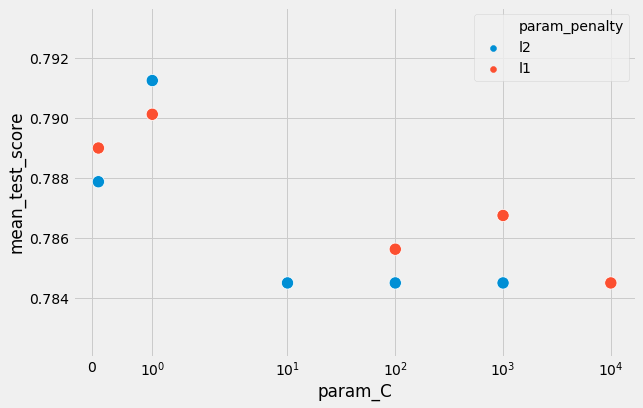

In [59]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(9,6))

sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df[0:10], s=150)

plt.xscale('symlog')
#plt.ylim((0.9,1))
plt.show()

### 2.2. RandomizedSearchCV

#### <font color='light bule'> Randomize Search yöntemi Grid Search yöntemine çok benzemektedir. Grid Search yönteminde parametrelerin alabileceği tüm kombinasyonlar denenmekte iken Randomize Search yönteminde istenen sayıdaki rastgele kombinasyonlar denenmektedir. Bu sayede Randomize Search yönteminde parametre olarak liste yerine bir değer aralığı da kullanılabilmektedir. 
    
#### <font color='red'> GridSearchCV fonksiyondan farklı olarak, kaç farklı kombinasyon deneneceğini n_iter parametreisi ile belirlememiz gerekmektedir.

In [60]:
parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [62]:
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')


rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']},
          pre_dispatch='2*n_jobs', random_state=111, refit=True,
          return_train_score='warn', scoring='precision', verbose=0)

In [63]:
print("En iyi parametreler        : ", rs_cv.best_params_)
print("Tüm hassasiyet değerleri   : ", rs_cv.cv_results_['mean_test_score'])
print("En iyi hassasiyet değeri   : ", rs_cv.best_score_)

En iyi parametreler        :  {'penalty': 'l2', 'C': 1}
Tüm hassasiyet değerleri   :  [0.69138907 0.71340329 0.73514902 0.75189787 0.73578094 0.73365888
 0.64600804 0.70340883 0.73578094 0.        ]
En iyi hassasiyet değeri   :  0.7518978658704233


In [64]:
sonuçlar_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(sonuçlar_rs)

In [65]:
sonuçlar_rs = rs_cv.cv_results_
df_rs = pd.DataFrame(sonuçlar_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)
df_rs

,param_penalty,param_C,mean_test_score
3,l2,1,0.751898
4,l1,100,0.735781
8,l1,1000,0.735781
2,l2,10,0.735149
5,l2,1000,0.733659
1,l2,0.001,0.713403
7,l1,0.001,0.703409
0,l2,0.0001,0.691389
6,l1,0.01,0.646008
9,l1,1e-05,0.000000


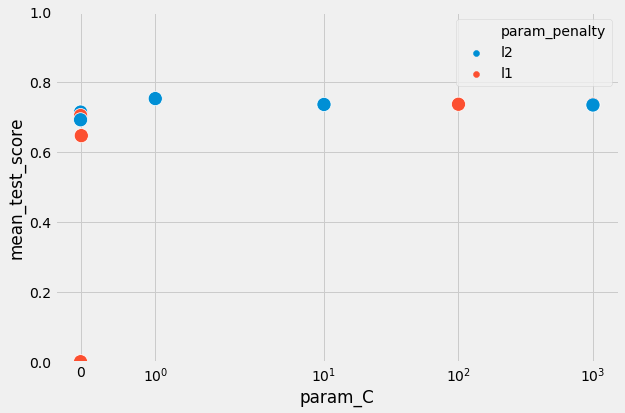

In [68]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(9,6))
sns.scatterplot(x = 'param_C', y = 'mean_test_score', hue = 'param_penalty', data = df_rs, s=200)
plt.xscale('symlog')
plt.ylim((0.0,1))
plt.show()


RandomizedSearchCV ve GridSearchCV makine öğrenimi modellerini eğitirken sıklıkla kullanacağınız fonksiyonlar olacaktır. Hatta yeni algoritmalar öğrendikçe, parametrelerle birlikte en başarılı algoritmayı da bu fonksiyonlar aracılığıyla belirlenebilir.